In [39]:
import sys
sys.path.append("../") #make the file look above teh exploration folder into the code folder
import pandas as pd
import plotly.graph_objects as go
import datetime as dt
from plotting import CandlePlot

In [40]:
from infrastructure.instrument_collection import instrumentCollection as ic# Import the instrumentCollection instance from the infrastructure/instrument_collection.py file

In [41]:
pair = "GBP_JPY"
granularity="H4"
df = pd.read_pickle(f"../data/{pair}_{granularity}.pkl")
MA_LIST = [10, 20, 50, 100, 200]

In [42]:
df_ma = df[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c']].copy()

In [43]:
df_ma.head()

,time,mid_o,mid_h,mid_l,mid_c
0,2021-06-28 01:00:00+00:00,153.780,153.796,153.596,153.708
1,2021-06-28 05:00:00+00:00,153.712,154.230,153.666,154.180
2,2021-06-28 09:00:00+00:00,154.178,154.228,153.898,154.102
3,2021-06-28 13:00:00+00:00,154.104,154.206,153.450,153.495
4,2021-06-28 17:00:00+00:00,153.498,153.567,153.390,153.544


In [44]:
for ma in MA_LIST:
    df_ma[f'MA_{ma}'] = df_ma.mid_c.rolling(window=ma).mean()
df_ma.dropna(inplace=True)
df_ma.reset_index(inplace=True, drop=True)

In [45]:
df_plot = df_ma.iloc[:500]

In [46]:
cp = CandlePlot(df_plot)

In [47]:
traces = [ f"MA_{x}" for x in MA_LIST ]

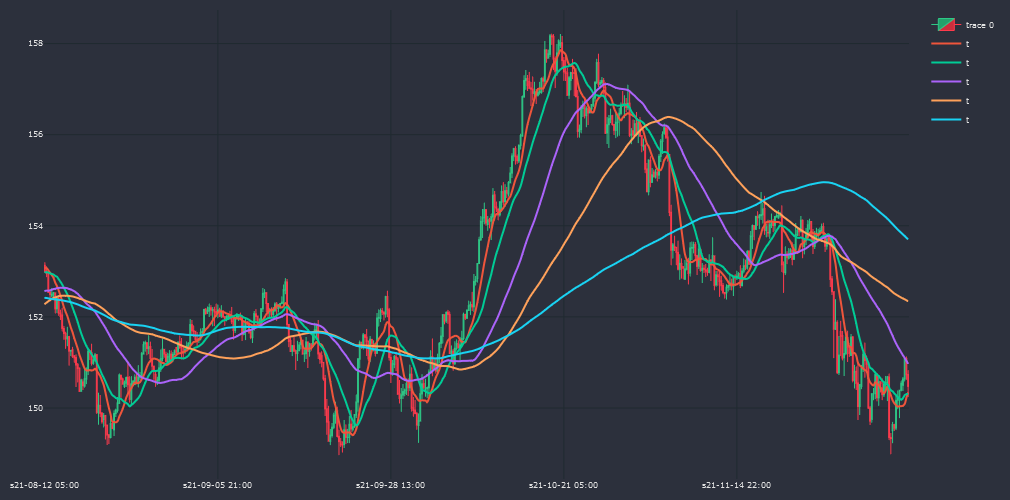

In [48]:
cp.show_plot(line_traces = traces)

In [49]:
MA_S = "MA_50"
MA_L = "MA_200"
BUY = 1
SELL = -1
NONE= 0

In [50]:
df_an = df_ma[['time', 'mid_o', 'mid_h', 'mid_l', 'mid_c', MA_S, MA_L]].copy()

In [51]:
df_an.head(30)

,time,mid_o,mid_h,mid_l,mid_c,MA_50,MA_200
0,2021-08-12 05:00:00+00:00,153.130,153.202,152.976,152.987,152.56790,152.418420
1,2021-08-12 09:00:00+00:00,152.990,153.112,152.870,152.954,152.57742,152.414650
2,2021-08-12 13:00:00+00:00,152.956,152.990,152.538,152.538,152.57522,152.406440
3,2021-08-12 17:00:00+00:00,152.540,152.592,152.334,152.491,152.58208,152.398385
4,2021-08-12 21:00:00+00:00,152.462,152.638,152.428,152.498,152.59588,152.393400
5,2021-08-13 01:00:00+00:00,152.496,152.548,152.416,152.522,152.61074,152.388290
6,2021-08-13 05:00:00+00:00,152.524,152.529,152.070,152.178,152.61674,152.383010
7,2021-08-13 09:00:00+00:00,152.180,152.474,152.082,152.402,152.63050,152.378430
8,2021-08-13 13:00:00+00:00,152.404,152.464,152.022,152.082,152.63494,152.373675
9,2021-08-13 17:00:00+00:00,152.079,152.160,151.930,152.019,152.63932,152.368710


In [52]:
df_an['DELTA'] = df_an.MA_50 - df_an.MA_200
df_an['DELTA_PREV'] = df_an.DELTA.shift(1)

In [53]:
def is_trade(row):
    if row.DELTA >= 0 and row.DELTA_PREV < 0:
        return BUY
    elif row.DELTA < 0 and row.DELTA_PREV >= 0:
        return SELL
    return NONE

In [54]:
df_an['TRADE'] = df_an.apply(is_trade, axis=1)

In [55]:
df_trades = df_an[df_an.TRADE != NONE].copy()

In [56]:
df_trades.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_50,MA_200,DELTA,DELTA_PREV,TRADE
28,2021-08-18 21:00:00+00:00,150.986,151.139,150.946,151.051,152.14970,152.150745,-0.001045,0.023490,-1
123,2021-09-09 17:00:00+00:00,152.015,152.021,151.750,151.828,151.77846,151.777910,0.000550,-0.015855,1
165,2021-09-20 17:00:00+00:00,149.270,149.544,149.182,149.402,151.57646,151.599845,-0.023385,0.012675,-1
254,2021-10-11 13:00:00+00:00,154.175,154.512,154.029,154.352,151.38858,151.356965,0.031615,-0.030855,1
389,2021-11-11 02:00:00+00:00,152.920,153.012,152.681,152.884,154.23446,154.252505,-0.018045,0.051735,-1


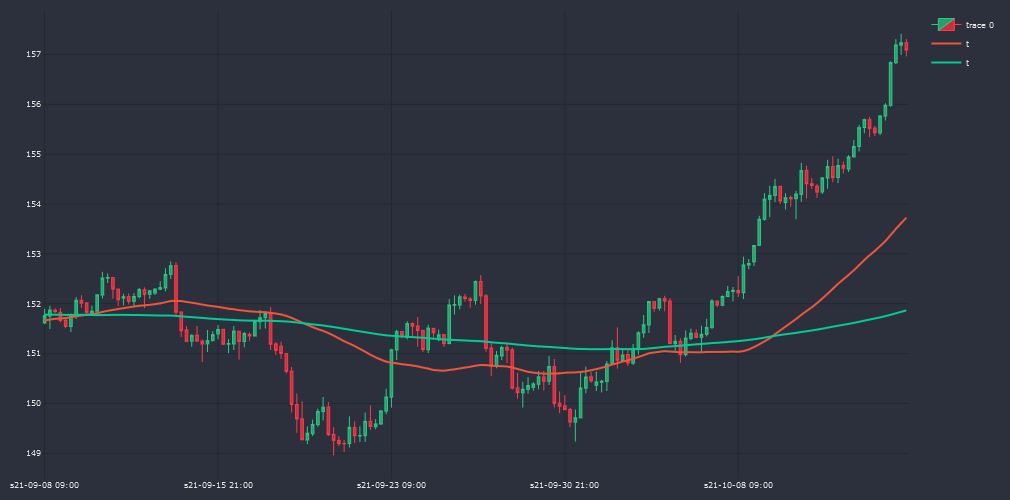

In [57]:
cp = CandlePlot(df_an.iloc[115:280])
cp.show_plot(line_traces=[MA_S, MA_L])

In [58]:
ic.LoadInstruments("../data")

In [59]:
ic.instruments_dict[pair]

{'name': 'GBP_JPY', 'ins_type': 'CURRENCY', 'displayName': 'GBP/JPY', 'pipLocation': 0.01, 'tradeUnitsPrecision': 0, 'marginRate': 0.05}

In [60]:
df_trades.shape

(32, 10)

In [61]:
ins_data = ic.instruments_dict[pair]

In [62]:
df_trades.head()

,time,mid_o,mid_h,mid_l,mid_c,MA_50,MA_200,DELTA,DELTA_PREV,TRADE
28,2021-08-18 21:00:00+00:00,150.986,151.139,150.946,151.051,152.14970,152.150745,-0.001045,0.023490,-1
123,2021-09-09 17:00:00+00:00,152.015,152.021,151.750,151.828,151.77846,151.777910,0.000550,-0.015855,1
165,2021-09-20 17:00:00+00:00,149.270,149.544,149.182,149.402,151.57646,151.599845,-0.023385,0.012675,-1
254,2021-10-11 13:00:00+00:00,154.175,154.512,154.029,154.352,151.38858,151.356965,0.031615,-0.030855,1
389,2021-11-11 02:00:00+00:00,152.920,153.012,152.681,152.884,154.23446,154.252505,-0.018045,0.051735,-1


In [63]:
df_trades['DIFF'] = df_trades.mid_c.diff().shift(-1)
df_trades.fillna(0, inplace=True)

In [64]:
df_trades['GAIN'] = df_trades['DIFF'] / ins_data.pipLocation
df_trades['GAIN'] = df_trades['GAIN'] * df_trades['TRADE']

In [65]:
df_trades.GAIN.sum()

-6694.700000000008

In [66]:
df_trades['GAIN_C'] = df_trades['GAIN'].cumsum()

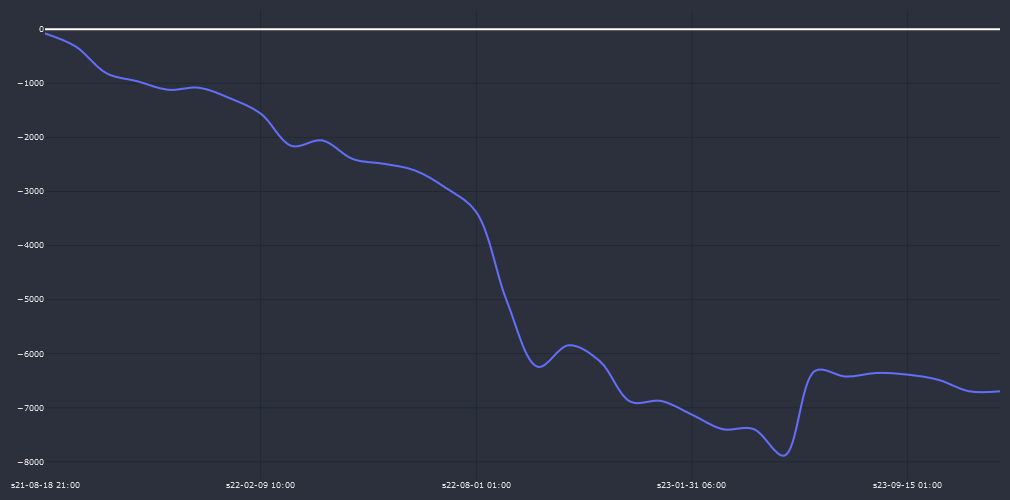

In [67]:
cp = CandlePlot(df_trades, candles=False)
cp.show_plot(line_traces=['GAIN_C'])